In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv
/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_trends.csv
/kaggle/input/us-states-ranked-by-population-2024/US States Ranked by Population 2024.csv


In [2]:
t1 = pd.read_csv('/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv')
#both the datasets are same, so we are going with t1
state_data = pd.read_csv('/kaggle/input/us-states-ranked-by-population-2024/US States Ranked by Population 2024.csv')

In [3]:
state_data = state_data.drop(columns = ["Rank","Population 2023","Growth Rate","% of US","Density (/mile2)"]).rename(columns = {'US State' : "US_State", "Population 2024" : "Population_2024"})

In [4]:
state_data.head()

,US_State,Population_2024
0,California,38889770
1,Texas,30976754
2,Florida,22975931
3,New York,19469232
4,Pennsylvania,12951275


In [5]:
#no data missing
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
col_name_mapping = {
    "Customer ID" : "Customer_ID",
    "Age" : "Age",
    "Gender" : "Gender",
    "Category" : "Category",
    "Location" : "Location",
    "Size" : "Size",
    "Color" : "Color",
    "Season" : "Season",
    "Item Purchased" : "Item_Purchased",
    "Purchase Amount (USD)" : "Purchase_Amount(USD)",
    "Review Rating" : "Review_Rating",
    "Subscription Status" : "Subscription_Status",
    "Shipping Type" : "Shipping_Type",
    "Discount Applied" : "Discount_Applied",
    "Promo Code Used" : "Promo_Code_Used",
    "Previous Purchases" : "Previous_Purchases",
    "Payment Method" : "Payment_Method",
    "Frequency of Purchases" : "Frequency_of_Purchases"
}

In [7]:
#modifying column names to eliminate whitespaces
t1.rename(columns = col_name_mapping, inplace = True)

In [8]:
t1.describe()

,Customer_ID,Age,Purchase_Amount(USD),Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


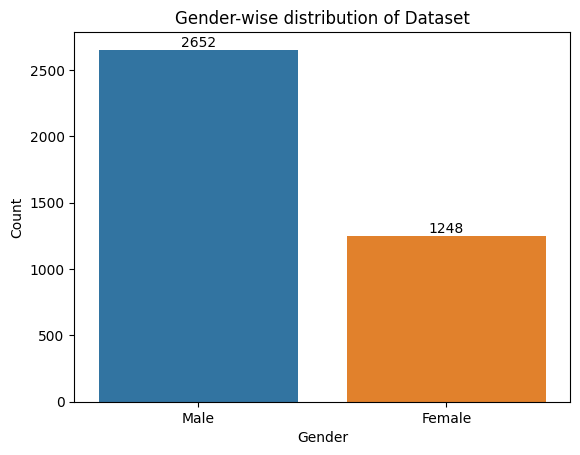

In [9]:
ax = sns.countplot(t1,  x= "Gender")
ax.bar_label(container = ax.containers[0])
plt.ylabel("Count")
plt.title("Gender-wise distribution of Dataset")
plt.show()

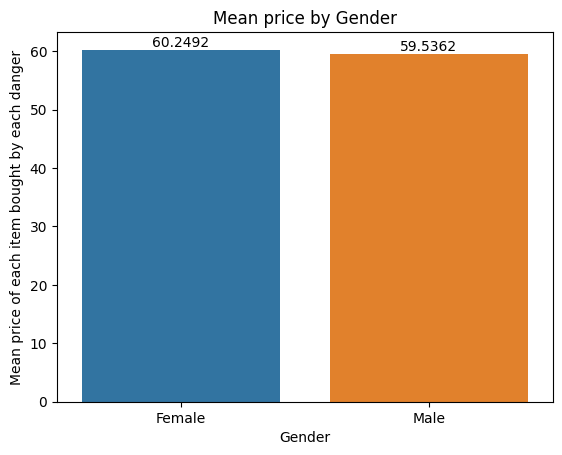

In [10]:
gender_amt = t1.groupby("Gender",as_index=False)['Purchase_Amount(USD)'].mean()
#men and women pay same amount per item
ax2 = sns.barplot(gender_amt, x = "Gender", y = "Purchase_Amount(USD)")
plt.bar_label(container = ax2.containers[0])
plt.ylabel("Mean price of each item bought by each danger")
plt.title("Mean price by Gender")
plt.show()

#Women bought slightly costlier items than Men in general

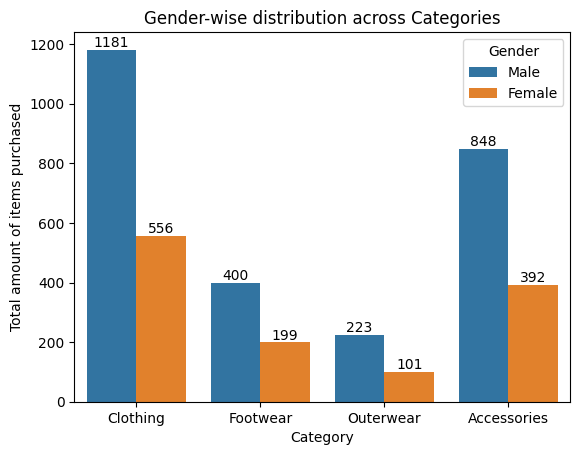

In [11]:
ax3 = sns.countplot(t1, x = "Category",hue="Gender")
ax3.bar_label(container=ax3.containers[0],label_type="edge")
ax3.bar_label(container=ax3.containers[1],label_type="edge")
plt.ylabel("Total amount of items purchased")
plt.title("Gender-wise distribution across Categories")
plt.show()

#Most People purchased Items falling in Clothing category
#Least People purchased Items falling in Outerwear category

#most women bought clothing items
#least women bought outerwear items

#most men bought clothing items
#least men bought outerwear items

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


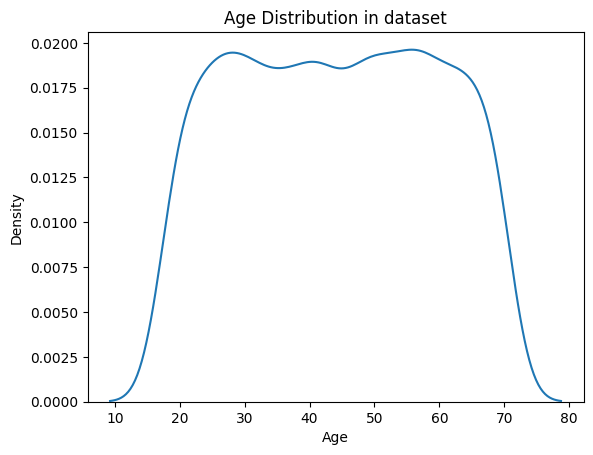

In [12]:
sns.kdeplot(t1,x = "Age")
plt.title("Age Distribution in dataset")
plt.show()

#Shows a normal distribution

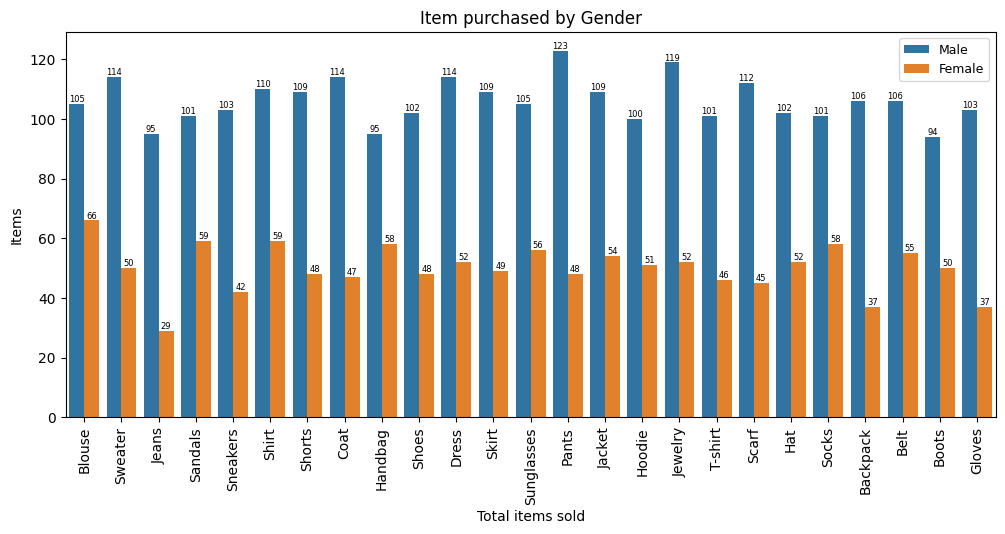

In [13]:
plt.figure(figsize = (12,5))
ax4 = sns.countplot(data=t1,x="Item_Purchased",hue = "Gender")
plt.bar_label(container = ax4.containers[0],fontsize = 6)
plt.bar_label(container = ax4.containers[1],fontsize = 6)
plt.xticks(rotation = 90)
plt.xlabel("Total items sold")
plt.ylabel("Items")
plt.title("Item purchased by Gender")
plt.legend(fontsize = 9)
plt.show()

#Men purchased Pants the most
#Men purchased Boots the least

#Women purchased Blouse the most
#Women purchased Jeans the least

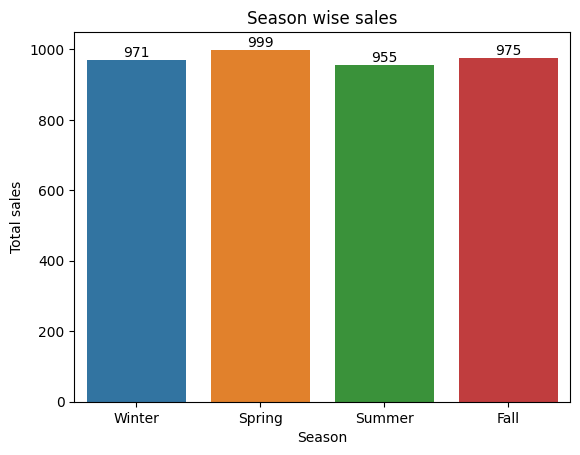

In [14]:
ax3 = sns.countplot(data = t1, x = "Season")
plt.bar_label(container = ax3.containers[0])
plt.title("Season wise sales")
plt.ylabel("Total sales")
plt.show()

#Most sales happened in Spring followed by Fall, Winter and Summer

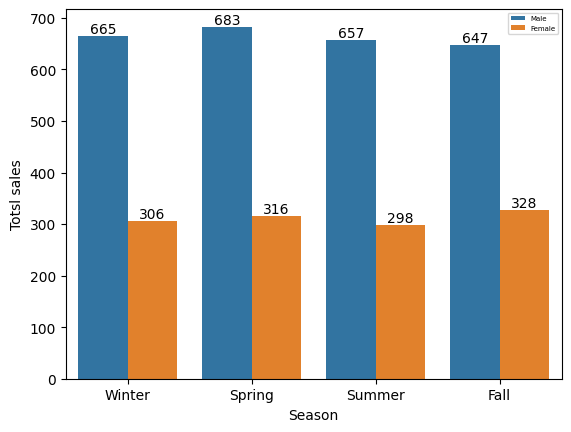

In [15]:
ax4 = sns.countplot(data = t1, x = "Season", hue = "Gender")
plt.bar_label(container = ax4.containers[0])
plt.bar_label(container = ax4.containers[1])
plt.legend(fontsize = 5)
plt.ylabel("Totsl sales")
plt.show()

#Men shopped the most in Spring, Winter, Summer and Fall
#Women shopped the most in Fall, Spring, Winter and Summer

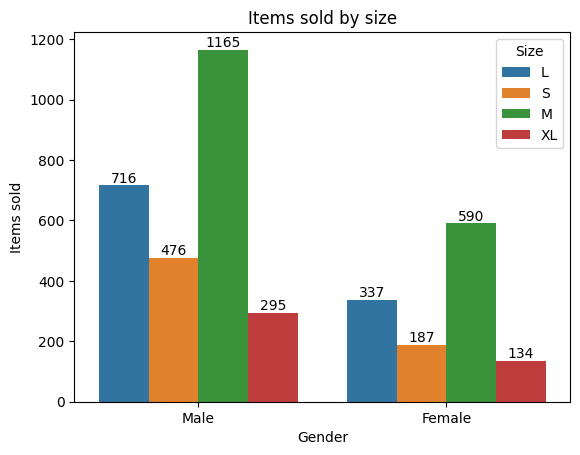

In [16]:
ax5 = sns.countplot(data = t1, x = "Gender", hue = "Size")
plt.bar_label(container = ax5.containers[0])
plt.bar_label(container = ax5.containers[1])
plt.bar_label(container = ax5.containers[2])
plt.bar_label(container = ax5.containers[3])
plt.ylabel("Items sold")
plt.title("Items sold by size")
plt.show()

# Men bought mostly M size items followed by L, S and XL
# Women showed similar buying patterns as Men

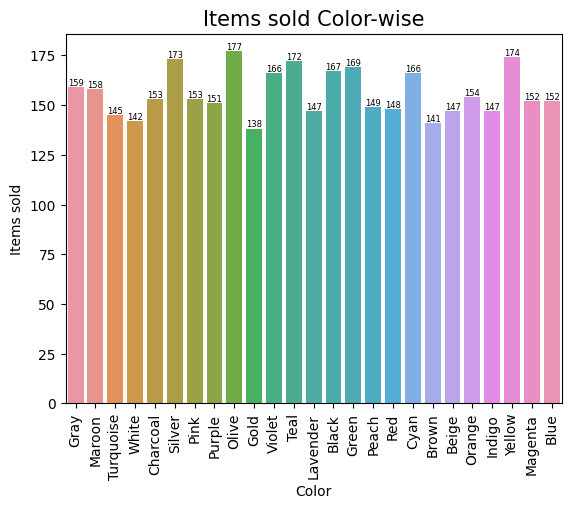

In [17]:
ax6 = sns.countplot(data = t1, x = "Color")
plt.bar_label(container = ax6.containers[0],fontsize = 6)
plt.title("Items sold Color-wise",fontsize = 15)
plt.ylabel("Items sold")
plt.xticks(rotation = 90)
plt.show()

#People bought Olive items the most
#People bought Gold items the least

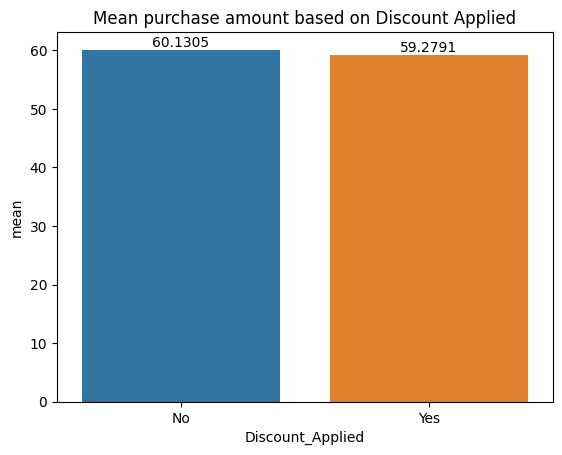

In [18]:
discount_purchase = t1.groupby("Discount_Applied")["Purchase_Amount(USD)"].agg(["count","mean"])
ax7 = sns.barplot(data = discount_purchase, x = discount_purchase.index, y = "mean")
plt.title("Mean purchase amount based on Discount Applied")
plt.bar_label(container = ax7.containers[0])
plt.show()

#Mean value of Items purchased is a bit higher when Discount was not applied
#It tells us that people apply discount to decresase the price slightly below the average price of other items

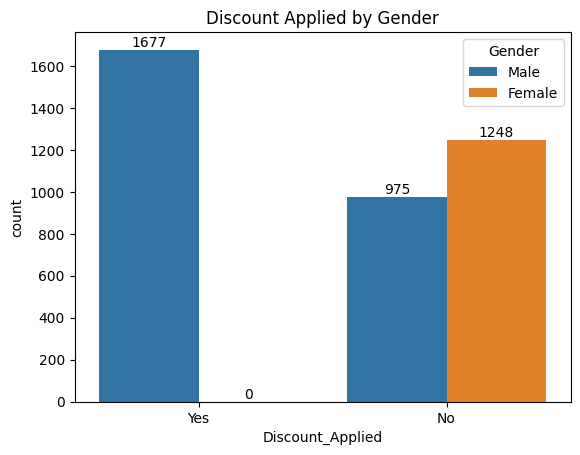

In [19]:
discount_gender_plot = sns.countplot(data = t1, x = "Discount_Applied", hue = "Gender")
plt.bar_label(container = discount_gender_plot.containers[0])
plt.bar_label(container = discount_gender_plot.containers[1])
plt.title("Discount Applied by Gender")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


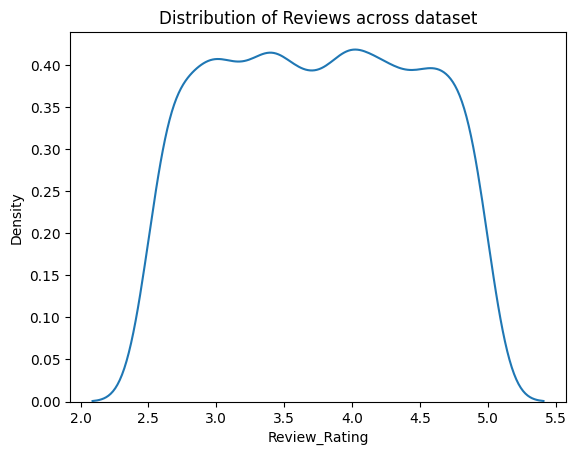

In [20]:
sns.kdeplot(data = t1, x = "Review_Rating")
plt.title("Distribution of Reviews across dataset")
plt.show()

#Shows normale-esque distribution pattern

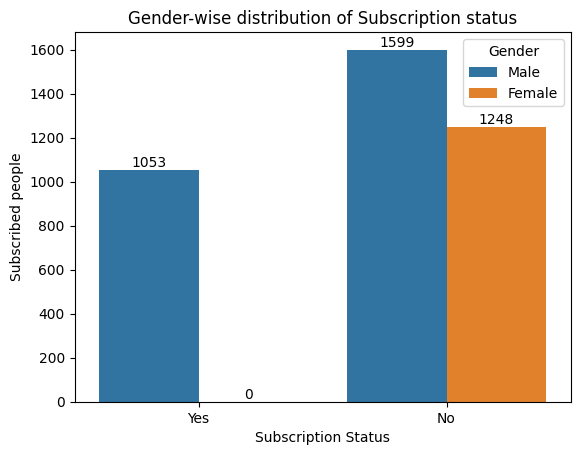

In [21]:
ax8 = sns.countplot(data = t1, x = "Subscription_Status", hue = "Gender")
plt.bar_label(container = ax8.containers[0])
plt.bar_label(container = ax8.containers[1])
plt.title("Gender-wise distribution of Subscription status")
plt.xlabel("Subscription Status")
plt.ylabel("Subscribed people")
plt.show()

#No Female customer has subscribed, big takeaway

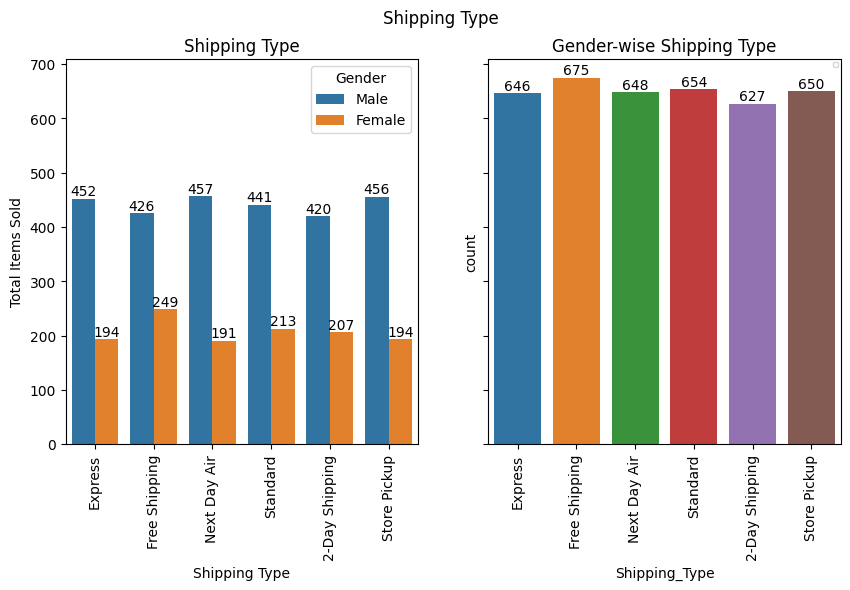

In [22]:
fig,axes = plt.subplots(1,2,sharex = True,sharey = True, figsize = (10,5)) #1 row, 2 columns
fig.suptitle("Shipping Type")

ax9 = sns.countplot(ax = axes[0], data = t1, x = "Shipping_Type", hue = "Gender")
plt.title("Shipping Type")
axes[0].set_xlabel("Shipping Type")
axes[1].set_xlabel("Shipping Type")
axes[0].set_title("Shipping Type")
axes[0].set_ylabel("Total Items Sold")
axes[1].set_ylabel("Total Items Sold")
axes[0].bar_label(ax9.containers[0])
axes[0].bar_label(ax9.containers[1])
ax10 = sns.countplot(ax = axes[1], data = t1, x = "Shipping_Type")

plt.bar_label(container = ax10.containers[0])
plt.title("Gender-wise Shipping Type")

axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

plt.legend(fontsize = 4,loc = "upper right")

plt.show()

#Next Day Air was the most chosen Shipping Type chosen by Men, closely followed by Store Pickup and Express
#Free Shipping was the most chosen Shipping Type chosen by Women, followed by Standard and 2-Day Shippin


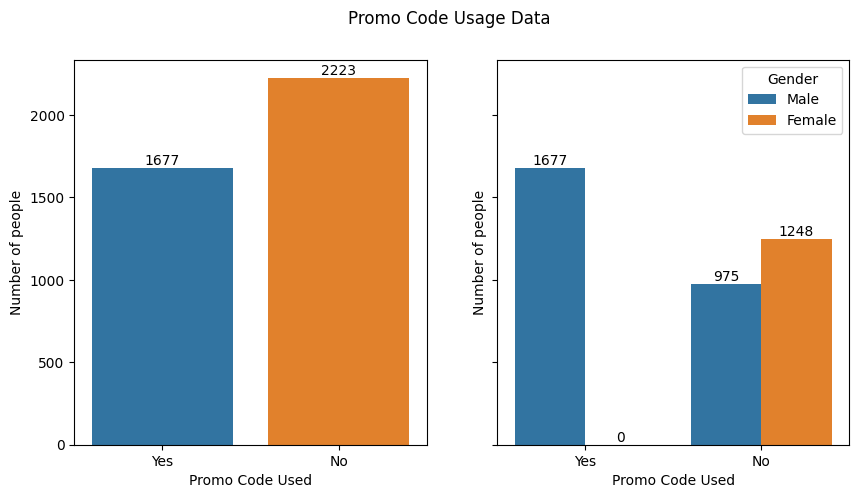

In [23]:
fig2, axes2 = plt.subplots(1,2, sharex = True, sharey = True, figsize = (10,5))
fig2.suptitle("Promo Code Usage Data")

ax11 = sns.countplot(ax = axes2[0], data = t1, x = "Promo_Code_Used")
axes2[0].set_xlabel("Promo Code Used")
axes2[0].set_ylabel("Number of people")
axes2[0].bar_label(ax11.containers[0])

ax12 = sns.countplot(ax = axes2[1], data = t1, x = "Promo_Code_Used", hue = "Gender")
axes2[1].set_xlabel("Promo Code Used")
axes2[1].set_ylabel("Number of people")
axes2[1].bar_label(ax12.containers[0])
axes2[1].bar_label(ax12.containers[1])

plt.show()

#only Males used Promo Codes

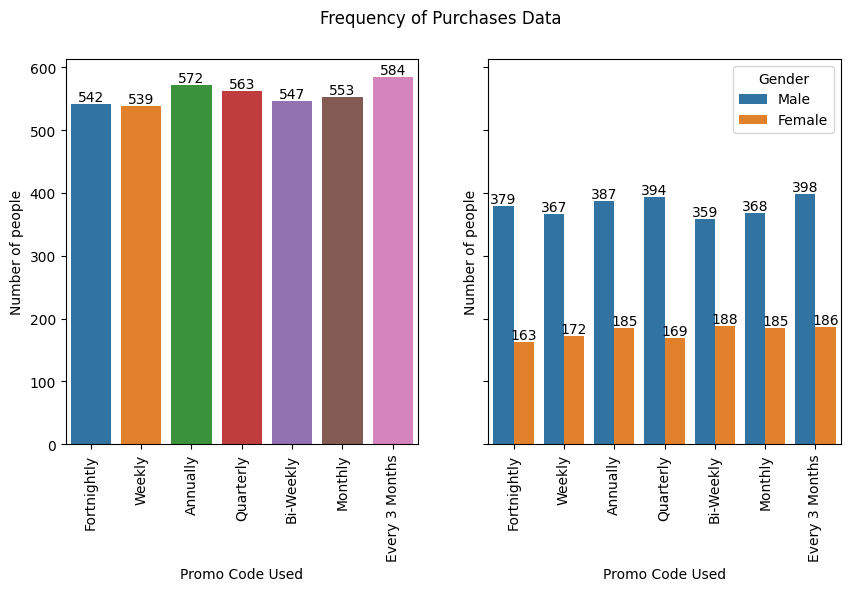

In [24]:
fig3, axes3 = plt.subplots(1,2, sharex = True, sharey = True, figsize = (10,5))
fig3.suptitle("Frequency of Purchases Data")

ax13 = sns.countplot(ax = axes3[0], data = t1, x = "Frequency_of_Purchases")
axes3[0].set_xlabel("Promo Code Used")
axes3[0].set_ylabel("Number of people")
axes3[0].bar_label(ax13.containers[0])

ax14 = sns.countplot(ax = axes3[1], data = t1, x = "Frequency_of_Purchases", hue = "Gender")
axes3[1].set_xlabel("Promo Code Used")
axes3[1].set_ylabel("Number of people")
axes3[1].bar_label(ax14.containers[0])
axes3[1].bar_label(ax14.containers[1])

axes3[0].tick_params(axis='x', rotation=90)
axes3[1].tick_params(axis='x', rotation=90)

plt.show()

#most customers(including separate categories of men and women) order once every 3 months

In [25]:
p3 = t1.groupby("Frequency_of_Purchases",as_index = False)["Previous_Purchases"].mean()
p3 = p3.sort_values("Previous_Purchases")
p3

,Frequency_of_Purchases,Previous_Purchases
0,Annually,24.561189
1,Bi-Weekly,24.787934
2,Every 3 Months,24.960616
3,Fortnightly,25.271218
4,Monthly,25.278481
6,Weekly,25.771800
5,Quarterly,26.854352


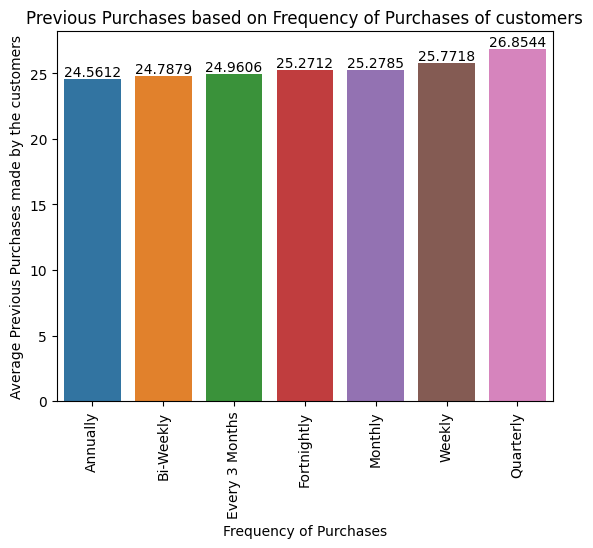

In [26]:
ax15 = sns.barplot(data = p3, x = "Frequency_of_Purchases", y = "Previous_Purchases")
plt.title("Previous Purchases based on Frequency of Purchases of customers")
plt.bar_label(ax15.containers[0])
plt.ylabel("Average Previous Purchases made by the customers")
plt.xlabel("Frequency of Purchases")
plt.xticks(rotation = 90)
plt.show()

#customers who order quarterly are ordering for the longest time

In [27]:
state_data["Population_2024(in 100,000s)"] = state_data["Population_2024"] / 100000

In [28]:
loc_wise = t1.groupby("Location", as_index = False)["Purchase_Amount(USD)"].agg(["count","mean","sum"])
loc_wise = loc_wise.rename(columns = {"Location" : "US_State"})

In [29]:
loc_wise2 = loc_wise.merge(state_data, how = "inner", right_on="US_State", left_on = "US_State")

In [30]:
loc_wise2["Items sold per 100,000 people"] = loc_wise2["count"] / loc_wise2["Population_2024(in 100,000s)"]
loc_wise2["Mean price of item per 100,000 people"] = loc_wise2["mean"] / loc_wise2["Population_2024(in 100,000s)"]

In [31]:
loc_wise2.head()

,US_State,count,mean,sum,Population_2024,"Population_2024(in 100,000s)","Items sold per 100,000 people","Mean price of item per 100,000 people"
0,Alabama,89,59.112360,5261,5143033,51.43033,1.730496,1.149368
1,Alaska,72,67.597222,4867,733536,7.33536,9.815469,9.215256
2,Arizona,65,66.553846,4326,7497004,74.97004,0.867013,0.887739
3,Arkansas,79,61.113924,4828,3089060,30.89060,2.557412,1.978399
4,California,95,59.000000,5605,38889770,388.89770,0.244280,0.151711


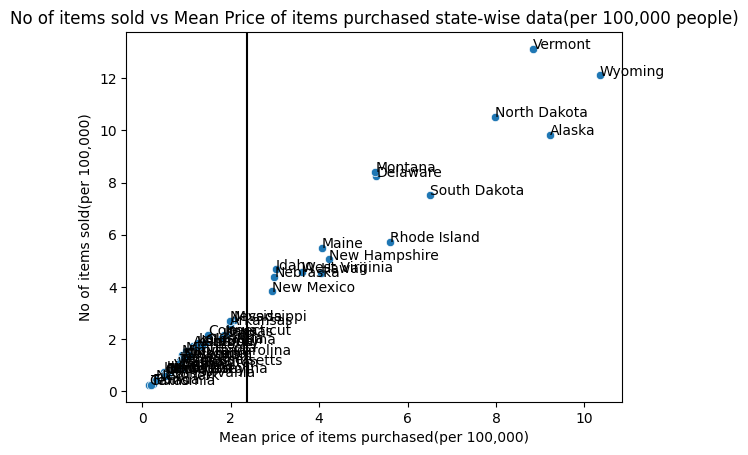

In [32]:
ax16 = sns.scatterplot(data = loc_wise2, x = "Mean price of item per 100,000 people", y = "Items sold per 100,000 people" )
plt.title("No of items sold vs Mean Price of items purchased state-wise data(per 100,000 people)")
plt.ylabel("No of items sold(per 100,000)")
plt.xlabel("Mean price of items purchased(per 100,000)")
for i in range(0,loc_wise2.shape[0]):
    ax16.text(x = loc_wise2.iloc[i,7],y = loc_wise2.iloc[i,6],s = loc_wise2.iloc[i,0])
avg_across_state1 = loc_wise2["Mean price of item per 100,000 people"].sum() / 50
plt.axvline(avg_across_state1, color = "black")
plt.show()

#We can see that Vermont and Wyoming purchased highest amount of items(Vermont being the highest)
#They are also the states with the highest mean price of items purchased which means not only did they 
#bought more items per 100,000 people but also purchased items worth more with Wyoming being the highest

In [33]:
t1.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
